In [ ]:
!pip install tensorflow==2.13
!pip install tensorflow-addons==0.22.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 32.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    Uninstalling gast-0.6.0:
      

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 12.1 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.0
    Uninstalling typeguard-4.4.0:
      Successfully uninstalled typeguard-4.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
import pandas as pd
import json
import zipfile
import os
import seaborn as sns
import random
import shutil
import time

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt

from keras.models import Sequential, Model

from tensorflow.keras.applications import InceptionV3, Xception, InceptionResNetV2, ResNet50
from tensorflow.keras.applications.resnet import preprocess_input

from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

In [ ]:
!pip install wandb


In [ ]:
import wandb
from wandb.integration.keras import WandbCallback # Importing from correct location

# Rest of your code using WandbCallback...

In [ ]:
import random
!mkdir output
!mkdir output/tmp-augmented-images/

random.seed(123)

In [ ]:
import json
kaggle = {
    "username": "<your-kaggle-username>",
    "api_key": "<your-kaggle-api-key>",
    "on_kernel": False,
    "dataset": {
        "sample": "-",
        "full": "paultimothymooney/chest-xray-pneumonia"
        }
}

if kaggle["on_kernel"]:
  path_prefix = '/kaggle/working/'
else:
  path_prefix = '/content/'

# Download dataset
def download_dataset(which_dataset):
  data = {"username": kaggle["username"],"key": kaggle["api_key"]}
  with open('kaggle.json', 'w') as json_file:
      json.dump(data, json_file)

  !mkdir -p ~/.kaggle
  !cp kaggle.json ~/.kaggle/
  !chmod 600 ~/.kaggle/kaggle.json
  kaggle_dataset = kaggle["dataset"][which_dataset]
  !kaggle datasets download -d $kaggle_dataset

  # Paths neeeds to be changed manually because of different directory structures, check with !ls
  if not os.path.isdir('dataset'):
    print("Unzipping... ")
    zip_ref = zipfile.ZipFile('chest-xray-pneumonia.zip', 'r')
    zip_ref.extractall('dataset')
    zip_ref.close()
    !rm -rf /content/dataset/chest_xray/chest_xray
    !rm -rf /content/dataset/chest_xray/__MACOSX
    !rm -rf /content/chest-xray-pneumonia.zip


  #!ls Data


download_dataset("full")

data_files = os.listdir("dataset/chest_xray")
print(data_files)

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:21<00:00, 164MB/s]
100% 2.29G/2.29G [00:21<00:00, 114MB/s]
Unzipping... 
['val', 'test', 'train']


In [ ]:
def resample_data(move_from, move_to, cl, images_to_move=100):
  path = path_prefix + 'dataset/chest_xray/'

  classes = os.listdir(path + move_from)

  cl += '/'
  curr_path = path + move_from + cl
  for _, _, files in os.walk(curr_path):
    random.shuffle(files)
    files_to_move = files[:images_to_move]
    for fn in files_to_move:a
      shutil.move(curr_path + fn, path + move_to + cl + fn)
      #print('Moved ' + curr_path + fn)

  print('Resampled Images')

move_from, move_to = 'train/', 'val/'
#resample_data(move_from, move_to, 'PNEUMONIA', 2534)



# Training images
print('Number of NORMAL training images:')
!ls /content/dataset/chest_xray/train/NORMAL/ | wc -l
print('Number of PNEUMONIA training images:')
!ls /content/dataset/chest_xray/train/PNEUMONIA/ | wc -l
print()


# Test images
#resample_data('test/', 'val/', 'PNEUMONIA', 2690)
print('Number of NORMAL test images:')
!ls /content/dataset/chest_xray/test/NORMAL/ | wc -l
print('Number of PNEUMONIA test images:')
!ls /content/dataset/chest_xray/test/PNEUMONIA/ | wc -l

Number of NORMAL training images:
1341
Number of PNEUMONIA training images:
3875

Number of NORMAL test images:
234
Number of PNEUMONIA test images:
390


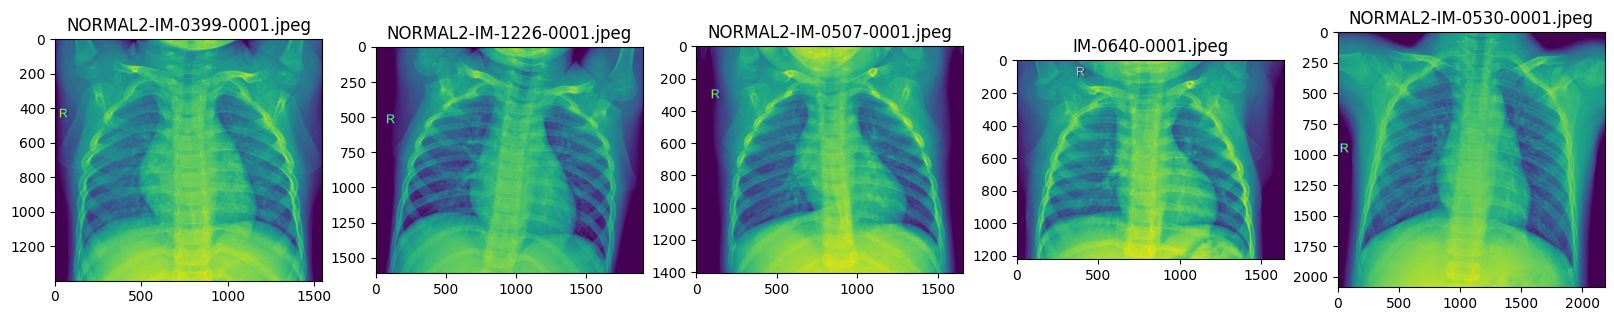

In [ ]:

import random
import os
import shutil
import zipfile
import time
from PIL import Image
!pip install matplotlib
import matplotlib.pyplot as plt
def viewImagesFromDir(path, num=5):
  #Display num random images from dataset. Rerun cell for new random images. The images are only single-channel

  img_paths_visualise = sorted(
        os.path.join(path, fname)
        for fname in os.listdir(path)
        if fname.endswith(".jpeg")
  )

  random.shuffle(img_paths_visualise)

  fig, ax = plt.subplots(1, num, figsize=(20, 10))

  for i in range(num):
    ax[i].imshow(Image.open(img_paths_visualise[i]))
    index = img_paths_visualise[i].rfind('/') + 1
    ax[i].title.set_text(img_paths_visualise[i][index:])

  fig.canvas.draw()
  time.sleep(1)

viewImagesFromDir('/content/dataset/chest_xray/train/NORMAL/', num=5)

In [ ]:
CLASSES = os.listdir('/content/dataset/chest_xray/train')
TRAINING_DATA_SET_PATH = '/content/dataset/chest_xray/train'
TEST_DATA_SET_PATH = '/content/dataset/chest_xray/test'

params = dict(
    seed = 123,
    image_dim = (288,288),
    weight_decay = 1e-4,
    epochs = 30,
    batch_size = 16,
    patch_size = 18,
    pool_size = (2,2),
    optimizer = 'Adam',
    l_rate = 0.001,
    val_split = .15,
    use_transfer_learning = False,
    use_data_aug = False,

    l2_reg = .0,
    projection_dim = 16,
    num_heads = 4,


    # Size of the transformer layers
    transformer_layers = 4,
    num_classes = len(CLASSES),
    mlp_head_units = [1024,512]

    )

new_params = dict(
    num_patches = (params['image_dim'][0] // params['patch_size']) ** 2,
    transformer_units = [
    params['projection_dim'] * 2,
    params['projection_dim']],
    input_shape = (288,288,3),

)
params.update(new_params)


if params['use_data_aug']:
  data_aug_params = dict(
      da_rotation = 20,
      da_w_shift = 0.1,
      da_h_shift = 0.1,
      da_shear = 0.05,
      da_zoom = 0.05,
      da_h_flip = False,
      da_v_flip = False,
  )

  params.update(data_aug_params)


# Ability to switch amount of channel to utilise pre-trained models with specific input shapes
if params['use_transfer_learning']:
  INPUT_SHAPE = (params['image_dim'][0], params['image_dim'][1], 3)
  COLOUR_MODE = 'rgb'
else:
  INPUT_SHAPE = (params['image_dim'][0], params['image_dim'][1], 3)
  COLOUR_MODE = 'rgb'

if params['use_data_aug']:
  datagen = ImageDataGenerator(validation_split=params['val_split'], rescale=1.0/255.0,
                               rotation_range=params['da_rotation'],
                               width_shift_range=params['da_w_shift'],
                               height_shift_range=params['da_h_shift'],
                               shear_range=params['da_shear'],
                               zoom_range=params['da_zoom'],
                               horizontal_flip=params['da_h_flip'],
                               vertical_flip=params['da_v_flip'],
                               fill_mode="constant",
                               cval=0
                               )
else:
  datagen = ImageDataGenerator(validation_split=params['val_split'])

# Read all training and validation data into variables from directory.
# Due to faulty quality of the given validation-set images, all images are taken from the training folder
train_generator = datagen.flow_from_directory(TRAINING_DATA_SET_PATH,
                                                    batch_size=params['batch_size'],
                                                    seed=123,
                                                    class_mode="categorical",
                                                    classes=CLASSES,
                                                    target_size=params['image_dim'],
                                                    color_mode=COLOUR_MODE,
                                                    subset='training',
                                                    shuffle=True)

val_datagen = ImageDataGenerator(validation_split=0.15, rescale=1.0/255.0)
valid_generator = datagen.flow_from_directory(TRAINING_DATA_SET_PATH,
                                                    batch_size=params['batch_size'],
                                                    seed=123,
                                                    class_mode="categorical",
                                                    classes=CLASSES,
                                                    target_size=params['image_dim'],
                                                    color_mode=COLOUR_MODE,
                                                    subset='validation',
                                                    shuffle=False)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(TEST_DATA_SET_PATH,
                                                    batch_size=params['batch_size'],
                                                    seed=123,
                                                    class_mode="categorical",
                                                    classes=CLASSES,
                                                    target_size=params['image_dim'],
                                                    color_mode=COLOUR_MODE,
                                                    shuffle=False)


Found 4434 images belonging to 2 classes.
Found 782 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]  # Dynamically infer batch size
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )

        patch_dims = tf.shape(patches)[-1]  # Dynamically compute patch dimensions

        # Now reshape patches with known dimensions
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches


# Linearly transform patches by projecting it into a
# vector of size `projection_dim` and also adds a learnable position
# embedding to the projected vector.
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

Image size: 288 X 288
Patch size: 18 X 18
Patches per image: 256
Elements per patch: 972


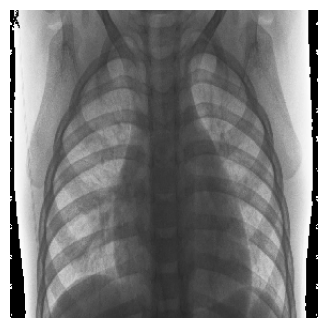

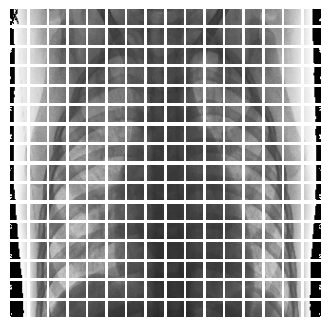

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image, label = iter(next(train_generator))
image = image[0]*255.
#image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow((image).astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(params['image_dim'][0], params['image_dim'][0])
)
patches = Patches(params['patch_size'])(resized_image)
print(f"Image size: {params['image_dim'][0]} X {params['image_dim'][0]}")
print(f"Patch size: {params['patch_size']} X {params['patch_size']}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (params['patch_size'], params['patch_size'], 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=params['input_shape'])
    # Create patches.
    patches = Patches(params['patch_size'])(inputs)
    # Encode patches.
    encoded_patches = PatchEncoder(params['num_patches'], params['projection_dim'])(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(params['transformer_layers']):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=params['num_heads'], key_dim=params['projection_dim'], dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=params['transformer_units'], dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=params['mlp_head_units'], dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(len(CLASSES))(features)
    #logits = layers.Dense(1, activation='sigmoid')(features)

    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
from keras import backend as K

# For experiment tracking
USE_WANDB = False

if USE_WANDB:
  wandb.init(tags=["ViT", "Binary"], project='dd2424', entity='teambumblebee', sync_tensorboard=True, config=params, save_code=True)
  print(params)
  wandb_callback = WandbCallback(monitor='val_f1_m',
                                 save_model=True,
                                 save_weights_only=False, mode='max',
                                 log_weights=True,
                                 data_type="image", verbose=1,
                                 labels=CLASSES,
                                 generator=valid_generator,
                                 predictions=50,
                                 log_evaluation=True,
                                 log_batch_frequency=1)

def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=params['l_rate'], weight_decay=params['weight_decay']
    )

    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2*((precision*recall)/(precision+recall+K.epsilon()))

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.BinaryAccuracy(name="binary_accuracy"), f1_m, recall_m, precision_m
        ],
    )


    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        "/content/output/model_best.h5",
        monitor="val_f1_m",
        save_best_only=True,
        save_weights_only=True,
        verbose=1,
        mode="max"
    )

    callbacks_list = [checkpoint_callback, tf.keras.callbacks.EarlyStopping(patience=20, monitor="val_binary_accuracy")]

    if USE_WANDB:
      callbacks_list.append(wandb_callback)


    history = model.fit(
        train_generator,
        batch_size=params['batch_size'],
        epochs=params['epochs'],
        validation_data=valid_generator,
        callbacks=callbacks_list)

    return history, model

model = create_vit_classifier()
history, model = run_experiment(model)

Epoch 1/30
278/278 [==============================] - ETA: 0s - loss: 0.5867 - binary_accuracy: 0.7864 - f1_m: 0.7720 - recall_m: 0.7352 - precision_m: 0.8227
Epoch 1: val_f1_m improved from -inf to 0.78891, saving model to /content/output/model_best.h5
278/278 [==============================] - 253s 885ms/step - loss: 0.5867 - binary_accuracy: 0.7864 - f1_m: 0.7720 - recall_m: 0.7352 - precision_m: 0.8227 - val_loss: 0.4527 - val_binary_accuracy: 0.8018 - val_f1_m: 0.7889 - val_recall_m: 0.7445 - val_precision_m: 0.8434
Epoch 2/30
278/278 [==============================] - ETA: 0s - loss: 0.2842 - binary_accuracy: 0.8804 - f1_m: 0.8754 - recall_m: 0.8469 - precision_m: 0.9087
Epoch 2: val_f1_m improved from 0.78891 to 0.84141, saving model to /content/output/model_best.h5
278/278 [==============================] - 236s 846ms/step - loss: 0.2842 - binary_accuracy: 0.8804 - f1_m: 0.8754 - recall_m: 0.8469 - precision_m: 0.9087 - val_loss: 0.3451 - val_binary_accuracy: 0.8606 - val_f1_m:

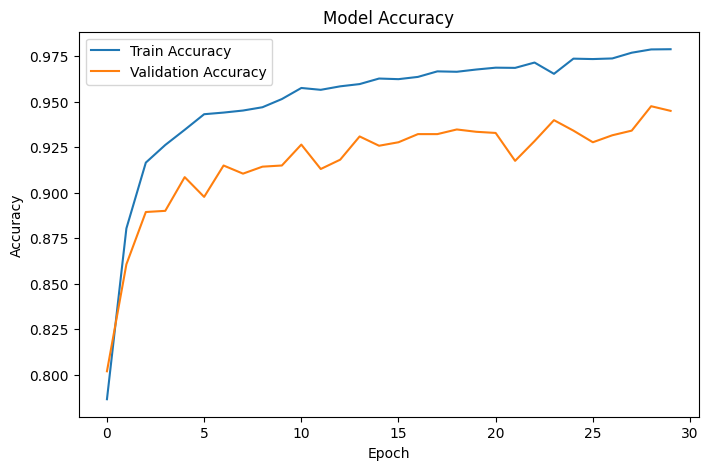

In [ ]:
plt.figure(figsize=(8, 5))

# Accessing accuracy and validation accuracy from the history object
plt.plot(history.history['binary_accuracy'], label='Train Accuracy') # Changed model to history and accuracy to binary_accuracy
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy') # Changed model to history and val_accuracy to val_binary_accuracy

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.5 MB/s eta 0:00:00


In [ ]:
model.save('/content/output/model_best.h5')  # Save as HDF5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
%%writefile app.py
import streamlit as st
from PIL import Image
import tensorflow as tf
import numpy as np
from keras import layers
from keras.utils import custom_object_scope
import tensorflow_addons as tfa
# Define your custom layers (ensure these match your model's architecture)
class Patches(tf.keras.layers.Layer):
    # Your implementation here
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches
    pass

class PatchEncoder(tf.keras.layers.Layer):
    # Your implementation here
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded
    pass
def f1_m(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)  # Assuming binary classification
    tp = tf.reduce_sum(y_true * y_pred)
    precision = tp / (tf.reduce_sum(y_pred) + tf.keras.backend.epsilon())
    recall = tp / (tf.reduce_sum(y_true) + tf.keras.backend.epsilon())
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return f1
def recall_m(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)  # Assuming binary classification
    true_positives = tf.reduce_sum(y_true * y_pred)
    possible_positives = tf.reduce_sum(y_true)
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall
def precision_m(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)  # Assuming binary classification
    true_positives = tf.reduce_sum(y_true * y_pred)
    predicted_positives = tf.reduce_sum(y_pred)
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision


# Function to load the model with custom layers
def load_model():
    with custom_object_scope({'Patches': Patches, 'PatchEncoder': PatchEncoder, 'f1_m': f1_m, 'recall_m': recall_m, 'precision_m': precision_m, 'AdamW': tfa.optimizers.AdamW}):
                  model = tf.keras.models.load_model('/content/output/model_best.h5')
    return model

# Load your trained model
model = load_model()

# Function to preprocess image for the model
def preprocess_image(image):
    img = image.resize((288, 288))  # Resize to match your model input size
    img = np.array(img) / 255.0      # Normalize the image
    # If the image is grayscale, convert to RGB
    if img.shape[-1] == 1:
        img = np.stack((img,) * 3, axis=-1)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to make predictions
def predict(image):
    processed_img = preprocess_image(image)
    prediction = model.predict(processed_img)

    # Ensure prediction is in the right shape and scale
    confidence = prediction[0][0] * 100  # This assumes model outputs a value between 0 and 1
    if confidence < 0:  # Check for any unexpected negative values
        confidence = 0
    elif confidence > 100:  # Check for any unexpected values over 100
        confidence = 100

    if confidence > 50:
        result = 'Pneumonia Detected'
    else:
        result = 'No Pneumonia Detected'

    return result, confidence



# Streamlit UI
st.title("Pneumonia Detection from Chest X-ray")
st.write("Upload a chest X-ray image to check if the person has pneumonia.")

# File uploader in Streamlit
uploaded_file = st.file_uploader("Choose an X-ray image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Chest X-ray.', use_column_width=True)

    #st.write("Classifying...")
    with st.spinner("Processing..."):
        result, confidence = predict(image)
        st.write(f"Result: **{result}**")
        st.write(f"Confidence Level: **{confidence:.2f}**")


Writing app.py


In [ ]:
!streamlit run app.py &>/dev/null&


In [ ]:
!ngrok config add-authtoken 2ntDVOS9K68FL9xba0j2qS5ZiUp_3QdA6ytJn7Bt1jbrwq5yL


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!streamlit run app.py --server.port 8501 &




2024-11-11 11:46:51.338 Port 8501 is already in use


In [ ]:
!curl http://localhost:8501


<!doctype html><html lang="en"><head><meta charset="UTF-8"/><meta name="viewport" content="width=device-width,initial-scale=1,shrink-to-fit=no"/><link rel="shortcut icon" href="./favicon.png"/><link rel="preload" href="./static/media/SourceSansPro-Regular.0d69e5ff5e92ac64a0c9.woff2" as="font" type="font/woff2" crossorigin><link rel="preload" href="./static/media/SourceSansPro-SemiBold.abed79cd0df1827e18cf.woff2" as="font" type="font/woff2" crossorigin><link rel="preload" href="./static/media/SourceSansPro-Bold.118dea98980e20a81ced.woff2" as="font" type="font/woff2" crossorigin><title>Streamlit</title><script>window.prerenderReady=!1</script><script defer="defer" src="./static/js/main.754d974e.js"></script><link href="./static/css/main.a1bc16b2.css" rel="stylesheet"></head><body><noscript>You need to enable JavaScript to run this app.</noscript><div id="root"></div></body></html>

In [ ]:
from pyngrok import ngrok

# Disconnect any existing ngrok connections
ngrok.kill()

# Connect ngrok to the Streamlit app
public_url = ngrok.connect(8501)
print("Streamlit app is live at:", public_url)


Streamlit app is live at: NgrokTunnel: "https://cdd5-34-16-251-131.ngrok-free.app" -> "http://localhost:8501"
